In [8]:
# Import Important Libraries
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import re

In [9]:
df = pd.read_csv("Data.csv")
df

,Unnamed: 0,Name,Test Number,Report Created On,Graduation Year,Date of Birth,Test Center,Level 1,Level 2,Level 3,...,Right Triangles and Trigonometry,Circles,Complex Numbers,Section1,Section2,Section3,Section4,Math_Score,English_Score,Test
0,0,Danielle Dodaro,SAT DT (SAT#1001),"AUG 20, 2019",2021,8/27/2003,Blue Bell,80%,54%,50%,...,0%,0%,0%,"[4, 5, 6, 8, 9, 10, 17, 18, 31, 32, 33, 34, 38...","[1, 4, 7, 8, 10, 23, 28, 30, 32, 35, 41, 44]","[5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 20]","[2, 3, 7, 13, 16, 18, 19, 24, 25, 26, 27, 30, ...",500,590,0.0
1,1,Heran Mulleta,SAT IT#4 (SAT#004),"JUN 8, 2022",2023,3/21/2005,323 - Maple Lawn,67%,50%,26%,...,0%,0%,100%,"[2, 3, 4, 6, 8, 9, 10, 21, 22, 24, 26, 27, 33,...","[4, 8, 13, 22, 33, 38, 43]","[8, 11, 12, 13, 16, 17, 18, 19, 20]","[4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",390,650,4.0
2,2,Iman Noor,SAT IT#3 (SAT#003),"MAR 5, 2022",2023,1/1/2001,201 - Almaden,100%,63%,42%,...,50%,50%,0%,"[1, 2, 3, 4, 6, 8, 9, 19, 20, 21, 31, 34, 37, ...","[2, 5, 6, 7, 10, 15, 16, 21, 26, 31, 34, 35, 3...","[5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18]","[2, 4, 5, 8, 10, 12, 15, 16, 20, 21, 22, 23, 2...",460,560,3.0
3,3,Diya Raj,SAT IT#4 (SAT#004),"OCT 21, 2023",2025,4/22/2007,McKinney,100%,79%,39%,...,100%,0%,100%,"[9, 10, 28]","[17, 29, 34]","[14, 16, 17, 19]","[6, 7, 8, 9, 10, 15, 17, 18, 19, 21, 22, 23, 2...",520,760,4.0
4,4,Matthew Brathwaite,SAT IT#2 (SAT#002),"OCT 14, 2020",2022,12/30/2003,Maple Lawn,67%,79%,52%,...,100%,0%,0%,"[8, 23, 25, 26]","[4, 15, 18, 19, 36, 39, 43]","[4, 6, 9, 14, 15, 16, 17, 18, 19, 20]","[1, 11, 15, 16, 18, 20, 21, 25, 28, 31, 32, 33...",530,720,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21371,21371,Parneet Gill,SAT IT#3 (SAT#003),"MAY 20, 2023",2025,2/1/2002,Berkeley,33%,63%,29%,...,50%,0%,0%,"[6, 8, 9, 10, 11, 13, 15, 19, 21, 30, 32, 34, ...","[2, 9, 10, 16, 17, 20, 21, 24, 28, 33, 35, 37,...","[3, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 1...","[4, 6, 7, 10, 12, 13, 14, 16, 17, 19, 20, 21, ...",420,590,3.0
21372,21372,Molly Xu,SAT IT#4 (SAT#004),"MAY 7, 2022",2023,2/3/2005,321 - Ellicott City,67%,93%,57%,...,100%,0%,100%,"[10, 24, 28, 33, 35, 36, 37]","[3, 12, 23, 24, 26, 32, 33, 39]","[17, 18, 19]","[4, 6, 7, 11, 12, 14, 15, 17, 19, 23, 27, 28, ...",580,690,4.0
21373,21373,Nayeon Song,SAT DT (SAT#1001),"OCT 25, 2022",2026,3/8/2008,Ellicott City,100%,92%,71%,...,100%,0%,0%,"[16, 18, 22, 23, 25, 29, 33, 41, 44, 50, 51, 52]","[1, 2, 3, 4, 5, 6, 13, 16, 18, 21, 32]","[2, 4, 5, 9, 10, 17, 18, 19, 20]","[3, 18, 21, 24, 30, 31, 33, 34, 35, 36, 37, 38]",590,630,0.0
21374,21374,Christian Lebold,SAT DT (SAT#1001),"JUN 8, 2022",2024,11/3/2005,322 - KOP - Blue Bell,40%,38%,29%,...,0%,0%,0%,"[3, 4, 5, 6, 8, 9, 17, 21, 22, 23, 25, 26, 28,...","[3, 4, 6, 7, 8, 10, 12, 14, 16, 17, 18, 19, 23...","[2, 4, 5, 8, 9, 11, 13, 15, 16, 17, 18, 19, 20]","[2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17,...",360,400,0.0


## Before we use our data we'll ensure that we remove any duplicate rows from the data

In [18]:
### Create a unique ID for every student
df['ID'] = -1                                                                               # Initialize ID column
id_mapping = {}                                                                             # Create a dictionary to store unique pairs of 'Name' and 'Test Center' along with corresponding IDs


for index, row in df.iterrows():                                                            # Iterate through rows and assign IDs
    name_test_center_pair = (row['Name'], row['Test Center'])
    if name_test_center_pair not in id_mapping:
        new_id = len(id_mapping)                                                            # If it's a new pair, assign a new ID
        id_mapping[name_test_center_pair] = new_id
    df.at[index, 'ID'] = id_mapping[name_test_center_pair]                                  # Update the 'ID' column with the assigned ID
    




### Sort students by ID and filter out any duplicate rows
new_df = pd.DataFrame()                                                                     # Create an empty DataFrame
for value in id_mapping.values():
    
    rows_with_target_id = df[df['ID'] == value]                                             # Use boolean indexing to filter rows with the specified ID
    rows_with_target_id = rows_with_target_id.sort_values(by='Test')
    rows_with_target_id_no_duplicates = rows_with_target_id.drop_duplicates(subset='Test')  # Remove duplicate rows based on the 'Test' column
    new_df = pd.concat([new_df, rows_with_target_id_no_duplicates])                         # Append the non-duplicate rows to the new DataFrame
    

new_df.reset_index(drop=True, inplace=True)                                                 # Reset the index of the new DataFrame

In [30]:
new_df.head(40)

,Unnamed: 0,Name,Test Number,Report Created On,Graduation Year,Date of Birth,Test Center,Level 1,Level 2,Level 3,...,Circles,Complex Numbers,Section1,Section2,Section3,Section4,Math_Score,English_Score,Test,ID
0,0,Danielle Dodaro,SAT DT (SAT#1001),"AUG 20, 2019",2021,8/27/2003,Blue Bell,80%,54%,50%,...,0%,0%,"[4, 5, 6, 8, 9, 10, 17, 18, 31, 32, 33, 34, 38...","[1, 4, 7, 8, 10, 23, 28, 30, 32, 35, 41, 44]","[5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 20]","[2, 3, 7, 13, 16, 18, 19, 24, 25, 26, 27, 30, ...",500,590,0.0,0
1,11543,Danielle Dodaro,SAT IT#3 (SAT#003),"SEP 15, 2020",2021,8/27/2003,Blue Bell,67%,63%,42%,...,50%,0%,"[9, 10, 13, 19, 25, 40, 42, 48, 49, 50, 51]","[7, 8, 16, 41]","[2, 5, 6, 7, 10, 12, 14, 15, 16, 17, 18, 19, 20]","[6, 8, 9, 10, 11, 19, 20, 21, 22, 23, 24, 25, ...",420,690,3.0,0
2,14212,Danielle Dodaro,SAT IT#4 (SAT#004),"SEP 22, 2020",2021,8/27/2003,Blue Bell,33%,79%,65%,...,0%,100%,"[5, 6, 10, 24, 35, 37, 46, 47]","[8, 13, 22, 23, 25, 29, 30, 33, 37, 38]","[1, 7, 12, 13, 16, 17, 18, 19, 20]","[4, 5, 6, 11, 23, 24, 27, 28, 29, 31, 34, 35, ...",560,670,4.0,0
3,10959,Heran Mulleta,SAT DT (SAT#1001),"SEP 8, 2021",2023,3/21/2005,323 - Maple Lawn,60%,54%,33%,...,0%,0%,"[1, 5, 9, 21, 22, 32, 39, 49, 52]","[1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 19, 25, 36, 3...","[4, 5, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20]","[3, 11, 12, 14, 16, 17, 18, 19, 20, 21, 23, 24...",410,620,0.0,1
4,1482,Heran Mulleta,SAT IT#1 (SAT#001),"OCT 9, 2021",2023,3/21/2005,323 - Maple Lawn,50%,25%,5%,...,0%,0%,"[2, 5, 6, 12, 14, 19, 24, 25, 29, 31, 34, 36, ...","[3, 4, 5, 17, 19, 21, 22, 23, 24, 25, 26, 27, ...","[2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...","[2, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 1...",300,420,1.0,1
5,9426,Heran Mulleta,SAT IT#2 (SAT#002),"DEC 22, 2021",2023,3/21/2005,323 - Maple Lawn,67%,57%,24%,...,0%,100%,"[2, 3, 4, 6, 7, 8, 9, 10, 12, 15, 16, 19, 20, ...","[1, 4, 5, 7, 8, 10, 16, 17, 18, 19, 22, 23, 24...","[1, 9, 11, 14, 15, 17, 18]","[1, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...",410,360,2.0,1
6,14416,Heran Mulleta,SAT IT#3 (SAT#003),"FEB 5, 2022",2023,3/21/2005,323 - Maple Lawn,67%,75%,58%,...,50%,0%,"[1, 9, 10, 19, 31, 32, 41]","[8, 16, 24, 29, 34, 37, 39]","[3, 7, 12, 15, 16, 17, 18, 19, 20]","[5, 10, 11, 16, 17, 18, 19, 20, 23, 25, 26, 27...",530,700,3.0,1
7,1,Heran Mulleta,SAT IT#4 (SAT#004),"JUN 8, 2022",2023,3/21/2005,323 - Maple Lawn,67%,50%,26%,...,0%,100%,"[2, 3, 4, 6, 8, 9, 10, 21, 22, 24, 26, 27, 33,...","[4, 8, 13, 22, 33, 38, 43]","[8, 11, 12, 13, 16, 17, 18, 19, 20]","[4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",390,650,4.0,1
8,5664,Iman Noor,SAT DT (SAT#1001),"DEC 11, 2021",2023,1/1/2001,201 - Almaden,60%,38%,50%,...,0%,0%,"[1, 2, 5, 6, 8, 9, 16, 21, 22, 27, 29, 31, 32,...","[2, 3, 4, 5, 6, 7, 8, 11, 14, 16, 18, 20, 23, ...","[1, 3, 4, 5, 8, 11, 12, 14, 17, 18, 19, 20]","[2, 3, 4, 6, 7, 8, 9, 12, 16, 17, 18, 19, 20, ...",450,500,0.0,2
9,5652,Iman Noor,SAT IT#2 (SAT#002),"FEB 23, 2022",2023,1/1/2001,201 - Almaden,33%,71%,52%,...,0%,100%,"[4, 5, 8, 9, 12, 20, 22, 23, 40, 42, 45, 47, 50]","[1, 2, 5, 6, 7, 8, 12, 14, 18, 19, 24, 31, 32,...","[1, 2, 3, 4, 9, 12, 14, 15, 16, 17, 18]","[2, 4, 5, 9, 10, 12, 13, 16, 18, 22, 23, 25, 2...",480,580,2.0,2


# Calculating Average Test Scores by Center
### Lets take a look at how performance varies for different testing centers thoughout the country.

In [21]:
### Dictionary with average English and math Scores for each center

# Convert the English and Math scores to numeric values
new_df['English_Score'] = pd.to_numeric(new_df['English_Score'], errors='coerce')
new_df['Math_Score'] = pd.to_numeric(new_df['Math_Score'], errors='coerce')

# Group by 'Test Center' and calculate the mean of the scores
grouped = new_df.groupby('Test Center')['English_Score', 'Math_Score'].mean()

# Convert the grouped data to a dictionary
average_scores_dict = grouped.to_dict('index')

# The keys are the test centers, and the values are dictionaries containing the average scores
average_scores_dict

/var/folders/sf/nzv1_w2n6m7dh_yrtw8c08n40000gn/T/ipykernel_37264/3702140575.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = new_df.groupby('Test Center')['English_Score', 'Math_Score'].mean()


{'101 - Bridgewater': {'English_Score': 637.4074074074074,
  'Math_Score': 624.8148148148148},
 '101 - Bridgewater GTA': {'English_Score': 570.0,
  'Math_Score': 591.6666666666666},
 '106 - Princeton': {'English_Score': 610.0, 'Math_Score': 570.0},
 '106 - Princeton - Mount Laurel': {'English_Score': 510.0,
  'Math_Score': 600.0},
 '107 - Marlboro': {'English_Score': 600.9401709401709,
  'Math_Score': 567.0940170940171},
 '107 - South Edison - Marlboro': {'English_Score': 617.4358974358975,
  'Math_Score': 582.8205128205128},
 '107 - South Edison - Marlboro -': {'English_Score': 628.9285714285714,
  'Math_Score': 578.2142857142857},
 '109 - Wheaton - Geneva': {'English_Score': 587.5, 'Math_Score': 487.5},
 '109 - Wheaton - Geneva - Downers': {'English_Score': 628.5714285714286,
  'Math_Score': 610.0},
 '111 - Eastchester': {'English_Score': 583.1884057971015,
  'Math_Score': 534.6376811594203},
 '111 - Eastchester - Mamaroneck': {'English_Score': 601.1111111111111,
  'Math_Score': 523.

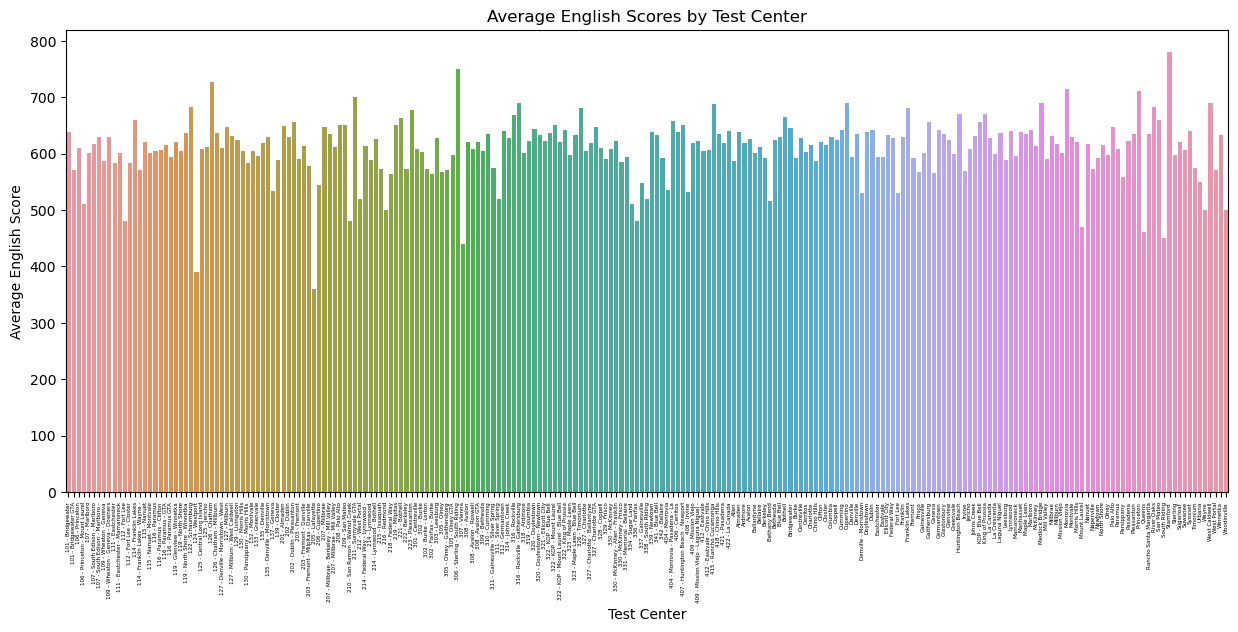

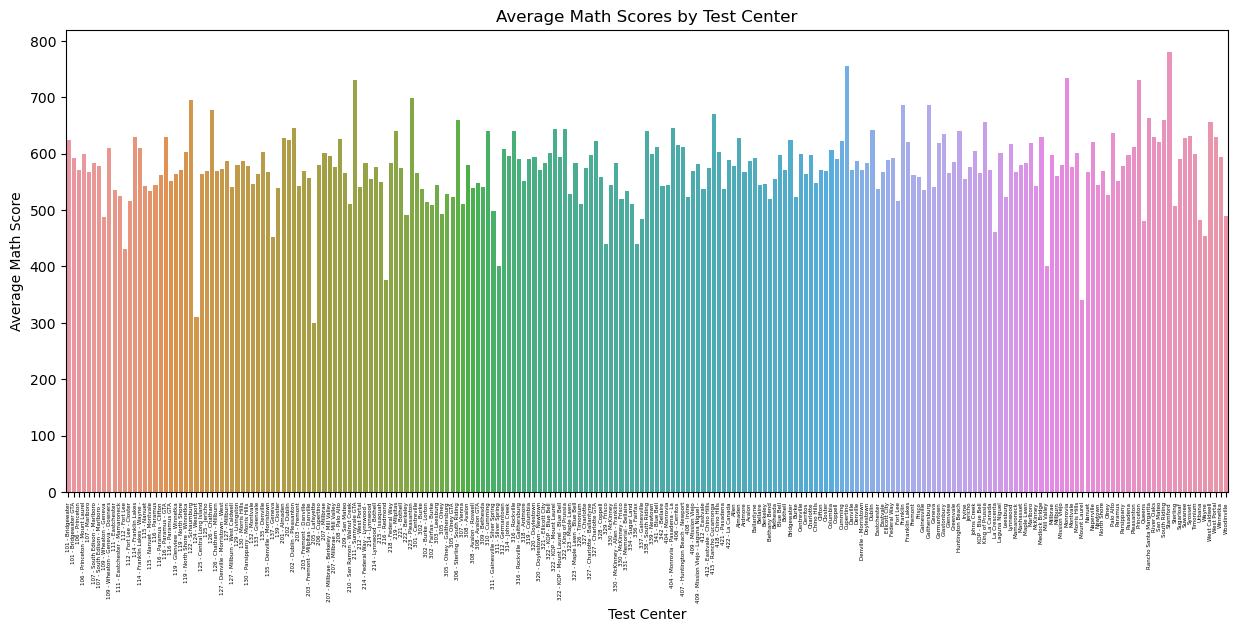

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to turn the groupby 'Test Center' index into a column
grouped_reset = grouped.reset_index()

# Plot for English Scores
plt.figure(figsize=(15, 6))
sns.barplot(x='Test Center', y='English_Score', data=grouped_reset)
plt.xticks(rotation=90, fontsize=4)  # Rotate the x labels to make them readable
plt.title('Average English Scores by Test Center')
plt.xlabel('Test Center')
plt.ylabel('Average English Score')
plt.show()

# Plot for Math Scores
plt.figure(figsize=(15, 6))
sns.barplot(x='Test Center', y='Math_Score', data=grouped_reset)
plt.xticks(rotation=90, fontsize=4)  # Rotate the x labels to make them readable
plt.title('Average Math Scores by Test Center')
plt.xlabel('Test Center')
plt.ylabel('Average Math Score')
plt.show()

# Visualizing Test Score Distribution

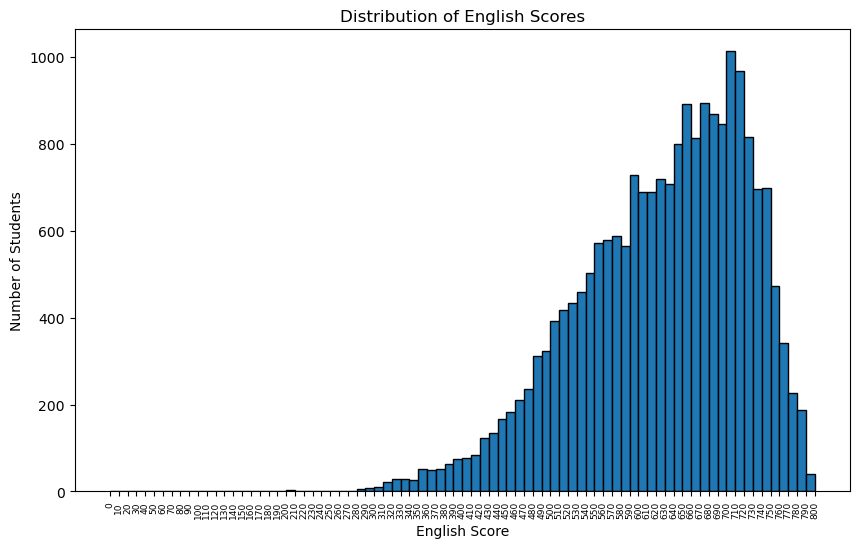

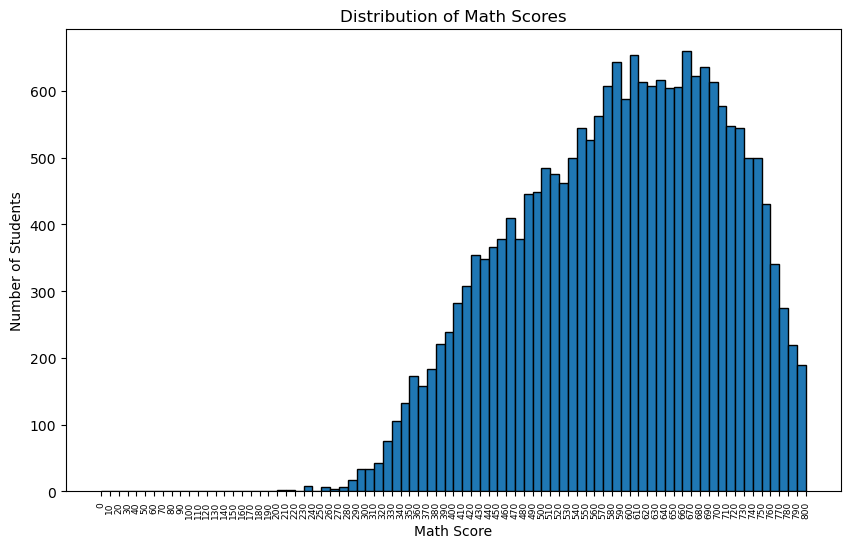

In [16]:
# Ensure the scores are numeric
new_df['English_Score'] = pd.to_numeric(new_df['English_Score'], errors='coerce')
new_df['Math_Score'] = pd.to_numeric(new_df['Math_Score'], errors='coerce')

# Histogram for English Scores
plt.figure(figsize=(10, 6))
plt.hist(new_df['English_Score'].dropna(), bins=range(0, 810, 10), edgecolor='black')
plt.title('Distribution of English Scores')
plt.xlabel('English Score')
plt.ylabel('Number of Students')
plt.xticks(range(0, 810, 10),rotation=90, fontsize=6.5)
plt.show()

# Histogram for Math Scores
plt.figure(figsize=(10, 6))
plt.hist(new_df['Math_Score'].dropna(), bins=range(0, 810, 10), edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.xticks(range(0, 810, 10),rotation=90, fontsize=6.5)
plt.show()


# Understanding Correlation between English and Math scores

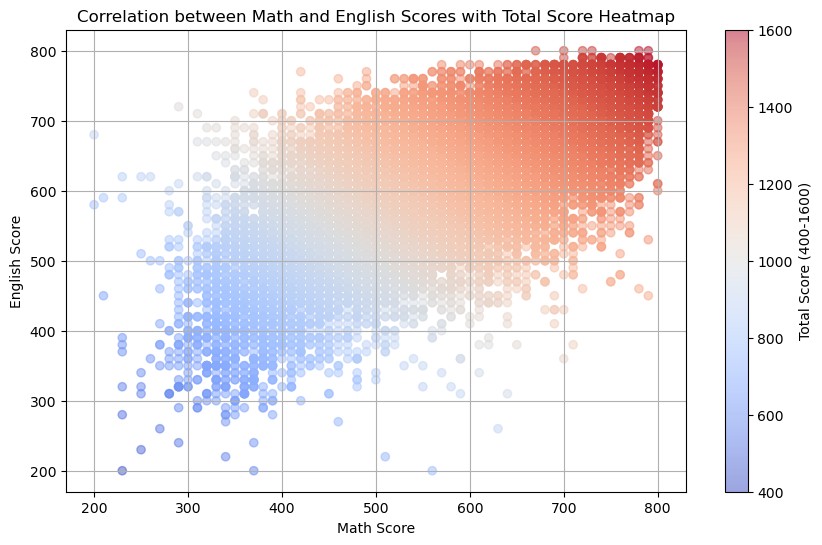

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Calculate the total score
new_df['Total_Score'] = new_df['English_Score'] + new_df['Math_Score']

# Define the colormap
cmap = plt.cm.get_cmap('coolwarm')  # You can choose a colormap that suits your preference

# Normalize the Total_Score for the colormap
norm = mcolors.Normalize(vmin=400, vmax=1600)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Math_Score'], new_df['English_Score'], alpha=0.5, c=new_df['Total_Score'], cmap=cmap, norm=norm)
plt.colorbar(label='Total Score (400-1600)')
plt.title('Correlation between Math and English Scores')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.grid(True)
plt.show()

# Assesing difficulty and features of math questions

In [75]:
# Import questions features
# - Percentage of students who answered Incorrectly
# - Problem Type
file_path1 = 'df_question_features.csv'
df_question_features = pd.read_csv(file_path1)
df_question_features.drop('Unnamed: 0', axis=1, inplace=True)
df_question_features

,%Incorrect,Heart of Algebra,Passport to Advanced Math,Problem Solving and Data Analysis,Additional Topics,MC,SA
0,0.337851,1,0,0,0,1,0
1,0.483508,1,0,0,0,1,0
2,0.549151,1,0,0,0,1,0
3,0.509471,0,1,0,0,1,0
4,0.605813,1,0,0,0,1,0
...,...,...,...,...,...,...,...
633,0.483721,0,1,0,0,0,1
634,0.037209,1,0,0,0,0,1
635,0.283721,0,0,0,1,0,1
636,0.479070,0,1,0,0,0,1


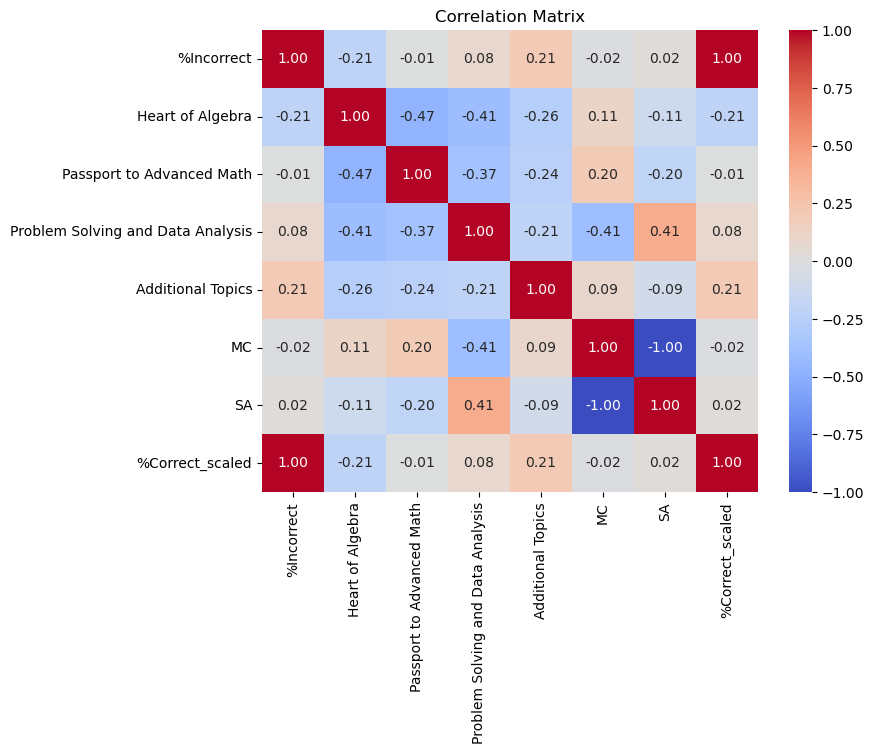

In [83]:
import seaborn as sns

# First, ensure that '%Correct' is a numeric column
df_question_features['%Incorrect'] = pd.to_numeric(df_question_features['%Incorrect'], errors='coerce')

# Calculate the correlation matrix
corr_matrix = df_question_features.corr()

# Use seaborn to create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [84]:
# Calculate the average '%Incorrect' for each topic
average_scores_by_topic = {
    'Heart of Algebra': df_question_features['%Incorrect'][df_question_features['Heart of Algebra'] == 1].mean(),
    'Passport to Advanced Math': df_question_features['%Incorrect'][df_question_features['Passport to Advanced Math'] == 1].mean(),
    'Problem Solving and Data Analysis': df_question_features['%Incorrect'][df_question_features['Problem Solving and Data Analysis'] == 1].mean(),
    'Additional Topics': df_question_features['%Incorrect'][df_question_features['Additional Topics'] == 1].mean()
}

average_scores_by_topic


{'Heart of Algebra': 0.24032155066610655,
 'Passport to Advanced Math': 0.29799534329052885,
 'Problem Solving and Data Analysis': 0.3295347712465005,
 'Additional Topics': 0.4183626824574567}

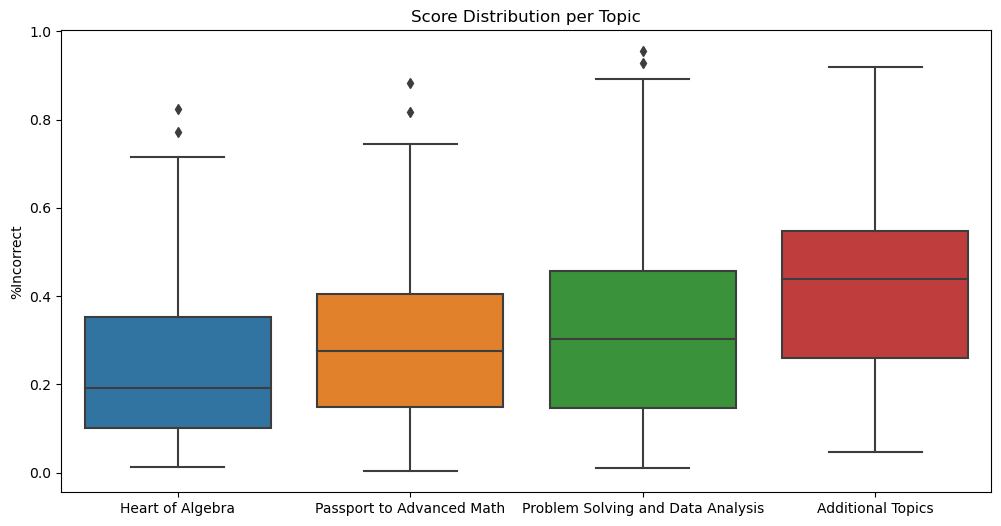

In [85]:
# Create a separate DataFrame for box plot
plot_data = pd.DataFrame({
    'Heart of Algebra': df_question_features['%Incorrect'][df_question_features['Heart of Algebra'] == 1],
    'Passport to Advanced Math': df_question_features['%Incorrect'][df_question_features['Passport to Advanced Math'] == 1],
    'Problem Solving and Data Analysis': df_question_features['%Incorrect'][df_question_features['Problem Solving and Data Analysis'] == 1],
    'Additional Topics': df_question_features['%Incorrect'][df_question_features['Additional Topics'] == 1]
})

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data)
plt.title('Score Distribution per Topic')
plt.ylabel('%Incorrect')
plt.show()

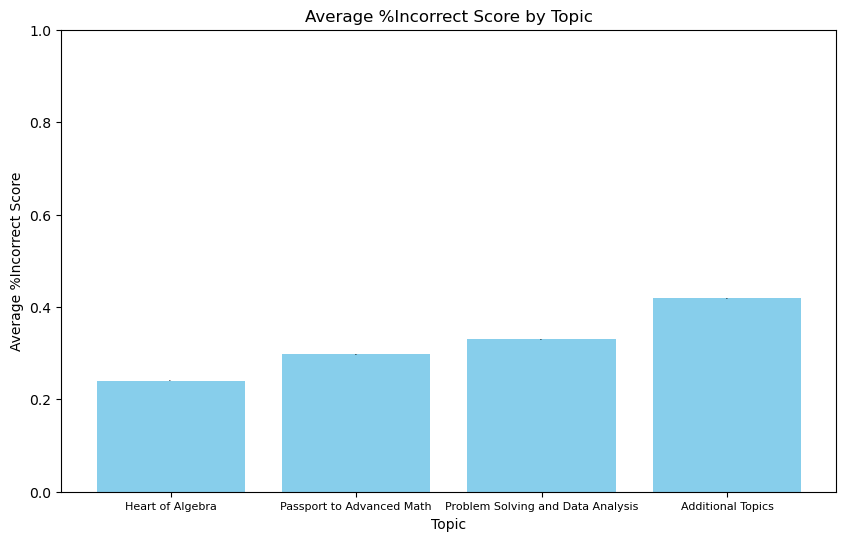

In [86]:
# Calculate the average '%Incorrect' for each topic
average_scores_by_topic = {
    'Heart of Algebra': df_question_features['%Incorrect'][df_question_features['Heart of Algebra'] == 1].mean(),
    'Passport to Advanced Math': df_question_features['%Incorrect'][df_question_features['Passport to Advanced Math'] == 1].mean(),
    'Problem Solving and Data Analysis': df_question_features['%Incorrect'][df_question_features['Problem Solving and Data Analysis'] == 1].mean(),
    'Additional Topics': df_question_features['%Incorrect'][df_question_features['Additional Topics'] == 1].mean()
}

# Data for plotting
topics = list(average_scores_by_topic.keys())
average_scores = list(average_scores_by_topic.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(topics, average_scores, color='skyblue')
plt.title('Average %Incorrect Score by Topic')
plt.xticks(fontsize=8)
plt.xlabel('Topic')
plt.ylabel('Average %Incorrect Score')
plt.ylim(0, 1)  # Assuming %Correct is between 0 and 1
for i in range(len(average_scores)):
    plt.text(i, average_scores[i], f'{average_scores[i]:.2f}', ha = 'center', fontsize=0.5)
plt.show()


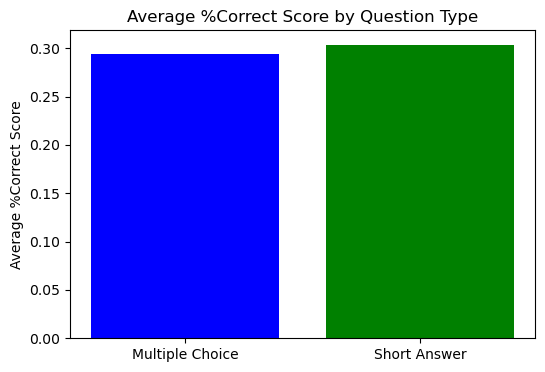

In [51]:
# Calculate the average '%Incorrect' for each question type
average_score_mc = df_question_features['%Incorrect'][df_question_features['MC'] == 1].mean()
average_score_sa = df_question_features['%Incorrect'][df_question_features['SA'] == 1].mean()


# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Multiple Choice', 'Short Answer'], [average_score_mc, average_score_sa], color=['blue', 'green'])
plt.title('Average %Incorrect Score by Question Type')
plt.ylabel('Average %Incorrect Score')
plt.show()

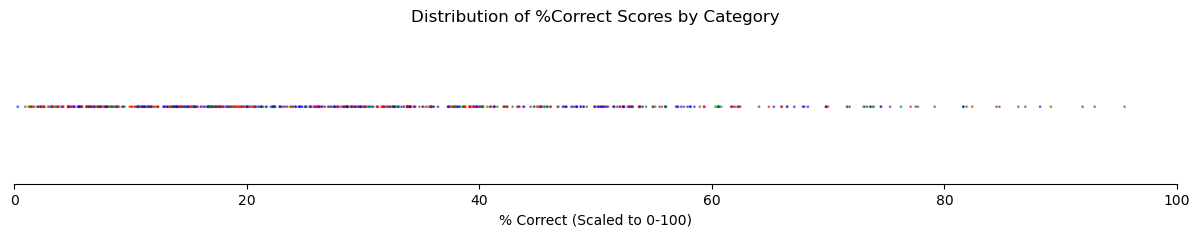

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df
# Convert '%Correct' to a scale of 0-100
df_question_features['%Incorrect_scaled'] = df_question_features['%Incorrect'] * 100

# Prepare data for plotting
x_coords = df_question_features['%Incorrect_scaled']
y_coords = np.zeros(len(df_question_features))  # All dots will have the same y-coordinate (0)

# Define a color for each category
colors = np.where(df_question_features['Heart of Algebra'] == 1, 'red', 
         np.where(df_question_features['Passport to Advanced Math'] == 1, 'blue', 
         np.where(df_question_features['Problem Solving and Data Analysis'] == 1, 'green', 
         'purple')))  # Default to purple for 'Additional Topics'

# Create the plot
plt.figure(figsize=(15, 2))  # Wide and short figure
plt.scatter(x_coords, y_coords, c=colors, alpha=0.5,s=1)
plt.yticks([])  # Hide y-axis ticks
plt.xlabel('% Incorrect (Scaled to 0-100)')
plt.xlim(0, 100)
plt.title('Distribution of %Incorrect Scores by Category')
plt.gca().spines['left'].set_visible(False)  # Hide the left spine
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.show()


In [ ]:
############################## Score Distribution Across Tutoring Centers ######################################
